## Importing Libraries

In [70]:
import os
os.environ['TF_USE_CUDNN'] = '0'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import shutil
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision
from torchvision import transforms

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from skimage.transform import resize
import tensorflow as tf
from tensorflow.keras import layers, models
import os
import matplotlib.image as mpimg
from skimage.transform import resize
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

## animal_dir = folder containing multiple folders of animals with images


In [71]:
animal_dir = "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals"
len(os.listdir(animal_dir))

90

## Names of animals in the dataset

In [72]:
with open("/kaggle/input/animal-image-dataset-90-different-animals/name of the animals.txt", 'r') as f:
    animal_info = f.read()
print(animal_info.split())

['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']


## Creating Dictionary with animal name as index and their image count as key

In [73]:
animal_names = {} 
animal_directories = os.listdir(animal_dir)

for animal_name in animal_directories:
    animal_path = os.path.join(animal_dir, animal_name)
    num_images = len(os.listdir(animal_path))
    animal_names[animal_name] = num_images

In [74]:
print(animal_names)


{'beetle': 60, 'parrot': 60, 'fox': 60, 'wolf': 60, 'hedgehog': 60, 'turtle': 60, 'snake': 60, 'shark': 60, 'horse': 60, 'antelope': 60, 'hamster': 60, 'woodpecker': 60, 'eagle': 60, 'chimpanzee': 60, 'bison': 60, 'penguin': 60, 'butterfly': 60, 'sandpiper': 60, 'hornbill': 60, 'lion': 60, 'lobster': 60, 'oyster': 60, 'otter': 60, 'grasshopper': 60, 'raccoon': 60, 'dog': 60, 'pigeon': 60, 'donkey': 60, 'hippopotamus': 60, 'hummingbird': 60, 'bear': 60, 'coyote': 60, 'bee': 60, 'pig': 60, 'rat': 60, 'owl': 60, 'caterpillar': 60, 'koala': 60, 'squid': 60, 'hare': 60, 'whale': 60, 'mouse': 60, 'tiger': 60, 'fly': 60, 'lizard': 60, 'orangutan': 60, 'bat': 60, 'porcupine': 60, 'kangaroo': 60, 'gorilla': 60, 'starfish': 60, 'mosquito': 60, 'crow': 60, 'possum': 60, 'goldfish': 60, 'swan': 60, 'elephant': 60, 'sheep': 60, 'dragonfly': 60, 'zebra': 60, 'seal': 60, 'octopus': 60, 'cow': 60, 'ox': 60, 'wombat': 60, 'reindeer': 60, 'panda': 60, 'duck': 60, 'goose': 60, 'goat': 60, 'badger': 60, '

# One v/s rest classification


## Preparing dataset for one v/s rest classification and Resizing images to same size (100 X100)

In [79]:
def prepare_dataset(data_dir):
    X = []
    y = []
    labels = os.listdir(data_dir)
    for label in labels:
            label_dir = os.path.join(data_dir, label)
            image_files = os.listdir(label_dir)
            for image_file in image_files:
                image_path = os.path.join(label_dir, image_file)
                image = mpimg.imread(image_path)
                resized_image = resize(image, (100, 100))  # Resize to desired dimensions
                X.append(resized_image)
                y.append(label)
            print(label)
    return np.array(X), np.array(y)

# Define the path to the dataset directory
dataset_dir = "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals"

# Prepare the dataset
X, y = prepare_dataset(dataset_dir)





beetle
parrot
fox
wolf
hedgehog
turtle
snake
shark
horse
antelope
hamster
woodpecker
eagle
chimpanzee
bison
penguin
butterfly
sandpiper
hornbill
lion
lobster
oyster
otter
grasshopper
raccoon
dog
pigeon
donkey
hippopotamus
hummingbird
bear
coyote
bee
pig
rat
owl
caterpillar
koala
squid
hare
whale
mouse
tiger
fly
lizard
orangutan
bat
porcupine
kangaroo
gorilla
starfish
mosquito
crow
possum
goldfish
swan
elephant
sheep
dragonfly
zebra
seal
octopus
cow
ox
wombat
reindeer
panda
duck
goose
goat
badger
flamingo
crab
seahorse
rhinoceros
dolphin
okapi
moth
sparrow
pelecaniformes
squirrel
leopard
jellyfish
ladybugs
cockroach
hyena
cat
deer
turkey
boar


In [80]:
X.shape

(5400, 100, 100, 3)

In [81]:
y.shape

(5400,)

In [82]:
animal_names

{'beetle': 60,
 'parrot': 60,
 'fox': 60,
 'wolf': 60,
 'hedgehog': 60,
 'turtle': 60,
 'snake': 60,
 'shark': 60,
 'horse': 60,
 'antelope': 60,
 'hamster': 60,
 'woodpecker': 60,
 'eagle': 60,
 'chimpanzee': 60,
 'bison': 60,
 'penguin': 60,
 'butterfly': 60,
 'sandpiper': 60,
 'hornbill': 60,
 'lion': 60,
 'lobster': 60,
 'oyster': 60,
 'otter': 60,
 'grasshopper': 60,
 'raccoon': 60,
 'dog': 60,
 'pigeon': 60,
 'donkey': 60,
 'hippopotamus': 60,
 'hummingbird': 60,
 'bear': 60,
 'coyote': 60,
 'bee': 60,
 'pig': 60,
 'rat': 60,
 'owl': 60,
 'caterpillar': 60,
 'koala': 60,
 'squid': 60,
 'hare': 60,
 'whale': 60,
 'mouse': 60,
 'tiger': 60,
 'fly': 60,
 'lizard': 60,
 'orangutan': 60,
 'bat': 60,
 'porcupine': 60,
 'kangaroo': 60,
 'gorilla': 60,
 'starfish': 60,
 'mosquito': 60,
 'crow': 60,
 'possum': 60,
 'goldfish': 60,
 'swan': 60,
 'elephant': 60,
 'sheep': 60,
 'dragonfly': 60,
 'zebra': 60,
 'seal': 60,
 'octopus': 60,
 'cow': 60,
 'ox': 60,
 'wombat': 60,
 'reindeer': 60,


In [83]:
y

array(['beetle', 'beetle', 'beetle', ..., 'boar', 'boar', 'boar'],
      dtype='<U14')

In [84]:
# Define the target animal name
target_animal_name = 'dog'

# Get the index of the target animal name from the labels array
target_class_index = np.where(y == target_animal_name)
target_class_index

(array([1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510,
        1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521,
        1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532,
        1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543,
        1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554,
        1555, 1556, 1557, 1558, 1559]),)

In [85]:
len(y)

5400

## 1-----> dog otherwise 0

In [86]:
# Convert labels to binary labels: 1 for the target class, 0 for all other classes
binary_labels = []
for i in range(len(y)):
    if np.isin(i, target_class_index):
        binary_labels.append(1)
    else:
        binary_labels.append(0)


In [87]:
print(binary_labels[1500:1560])


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## **Train test split (90% ,10%) and regularising the pixel values bw 0 and 1**

In [88]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, binary_labels, test_size=0.1, random_state=42)

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [89]:
X_test.shape

(540, 100, 100, 3)

In [90]:
y_train = np.array(y_train)

In [91]:
y_train.shape

(4860,)

In [92]:
X_train.shape

(4860, 100, 100, 3)

In [93]:
y_test = np.array(y_test)

In [94]:
y_test.shape

(540,)

## CNN Model

### More details of CNN model are written under the heading CNN

### Here the Conv2D ensures that each filter of 3X3 is applied to all R,G,B channels 

In [124]:
from keras import models, layers

def build_custom_cnn(input_shape):
    model = models.Sequential([
#         2D convolutional layer with 32 filters, each with a 3x3 kernel size, ReLU activation function
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
#         MaxPooling size (2X2) to reduce spatial dimension
        layers.MaxPooling2D((2, 2)),
#         normalizes the activations of the previous layer to stabilize and accelerate the training process.
        layers.BatchNormalization(),
#         Drop out at rate of 0.2 to prevent overfitting
        layers.Dropout(0.2),
#         2D convolutional layer with 64 filters, each with a 3x3 kernel size, ReLU activation function
        layers.Conv2D(128, (3, 3), activation='relu'),
#         flattens the input into a 1D array, preparing it for the fully connected layers
        layers.Flatten(),
#         adds a fully connected dense layer with 64 units and ReLU activation function.
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # One neuron for one vs rest classification
    ])
    
   
    return model
    

In [96]:
# Create the model
model = build_custom_cnn((100, 100, 3))
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 98, 98, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 49, 49, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 282752)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │    36,192,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,268,417 (138.35 MB)

 Trainable params: 36,268,289 (138.35 MB)

 Non-trainable params: 128 (512.00 B)

In [97]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## 3 Fold cross validation

In [98]:
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import ModelCheckpoint
import numpy as np
import os
# Define the number of folds
n_splits = 3

# Initialize StratifiedKFold with 3 folds
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation results
accuracy_scores = []
loss_scores = []

# Perform 3-fold cross-validation
for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train), 1):
    print(f"Fold {fold}:")
    print("Training samples:", len(train_index))
    print("Validation samples:", len(val_index))
    
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = np.array(y_train)[train_index], np.array(y_train)[val_index]
    
    # Create the model
    model = build_custom_cnn((100, 100, 3))
    
    # Define callbacks
    checkpoint = ModelCheckpoint(f'best_model_fold_{fold}.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model on the current fold
    history = model.fit(X_train_fold, y_train_fold, epochs=3, batch_size=16, 
                        validation_data=(X_val_fold, y_val_fold), callbacks=[checkpoint], verbose=1)
    
   

    # Check if the model checkpoint file exists before loading it
    checkpoint_filename = f'best_model_fold_{fold}.h5'
    if os.path.exists(checkpoint_filename):
        model.load_weights(checkpoint_filename)
    else:
        print(f"Model checkpoint '{checkpoint_filename}' not found.")

    # Evaluate the model on the validation set of the current fold
    loss, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)

    # Append the evaluation results to the respective lists
    loss_scores.append(loss)
    accuracy_scores.append(accuracy)

    print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}\n")

# Print the mean and standard deviation of the evaluation metrics across all folds
print("Mean Loss:", np.mean(loss_scores))
print("Standard Deviation of Loss:", np.std(loss_scores))
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Standard Deviation of Accuracy:", np.std(accuracy_scores))


Fold 1:
Training samples: 3240
Validation samples: 1620


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/3
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - accuracy: 0.9670 - loss: 0.1617
Epoch 1: val_accuracy improved from -inf to 0.99012, saving model to best_model_fold_1.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 149s 721ms/step - accuracy: 0.9671 - loss: 0.1614 - val_accuracy: 0.9901 - val_loss: 0.0715
Epoch 2/3
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 662ms/step - accuracy: 0.9922 - loss: 0.0514
Epoch 2: val_accuracy did not improve from 0.99012
203/203 ━━━━━━━━━━━━━━━━━━━━ 145s 712ms/step - accuracy: 0.9922 - loss: 0.0515 - val_accuracy: 0.9901 - val_loss: 0.0548
Epoch 3/3
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 664ms/step - accuracy: 0.9895 - loss: 0.0596
Epoch 3: val_accuracy did not improve from 0.99012
203/203 ━━━━━━━━━━━━━━━━━━━━ 202s 713ms/step - accuracy: 0.9895 - loss: 0.0596 - val_accuracy: 0.9901 - val_loss: 0.2263
Model checkpoint 'best_model_fold_1.h5' not found.
Validation Loss: 0.2263, Validation Accuracy: 0.9901

Fold 2:
Training samples: 3240
Validation samples: 1620
Epoch 1/3
203/203 ━━

In [99]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.9678 - loss: 0.1702
Test Accuracy: 0.9777777791023254


## As there are 2 classes dog or not dog if prob(class 1(dog)) >0.04 then it is class 1 else its not dog(class2)

In [117]:
y_pred_prob = model.predict(X_test)
print(y_pred_prob)
y_pred = (y_pred_prob > 0.04).astype(int)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_prob > 0.04))


17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step
[[0.015239881 ]
 [0.013868819 ]
 [0.019426446 ]
 [0.0059367428]
 [0.010299202 ]
 [0.0002979988]
 [0.0005443546]
 [0.011368787 ]
 [0.0073995353]
 [0.0063895197]
 [0.0033889571]
 [0.0006945963]
 [0.0016027184]
 [0.014682179 ]
 [0.0016831781]
 [0.0014330817]
 [0.0015411159]
 [0.005084505 ]
 [0.0002781609]
 [0.003472231 ]
 [0.0001073413]
 [0.0067872535]
 [0.010578092 ]
 [0.0001057891]
 [0.0023897693]
 [0.017209705 ]
 [0.0004214505]
 [0.0042348416]
 [0.0000135966]
 [0.0022832626]
 [0.0011716696]
 [0.0026653174]
 [0.0001495625]
 [0.01665544  ]
 [0.0010764586]
 [0.0000875701]
 [0.006561781 ]
 [0.0013557869]
 [0.0005372664]
 [0.0003534624]
 [0.007498641 ]
 [0.009311807 ]
 [0.009435109 ]
 [0.021479014 ]
 [0.0006162596]
 [0.004983622 ]
 [0.0000058174]
 [0.001304921 ]
 [0.0009952219]
 [0.0058246516]
 [0.0025298581]
 [0.0007846342]
 [0.0036109043]
 [0.020364348 ]
 [0.012399337 ]
 [0.0080328   ]
 [0.000575729 ]
 [0.0017988279]
 [0.007178248 ]
 [0.000413715 ]

### The descision boundary is coming at such low probability pertaining to the high bias of the image not being a dog as 5340 images are not dog while only 60 are dog

In [118]:
y_pred.shape

(540, 1)

In [119]:
y_pred_1d = y_pred.reshape(-1)
y_pred_1d

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [120]:
y_pred_1d.shape

(540,)

In [121]:
y_test

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [122]:
# Compare y_pred and y_test element-wise to find matches
matches = (y_pred_1d == y_test)

# Count the number of matching values
num_matches = np.sum(matches)

print("Number of matching values between y_test and y_pred:", num_matches)

Number of matching values between y_test and y_pred: 525


## Confusion Matrix

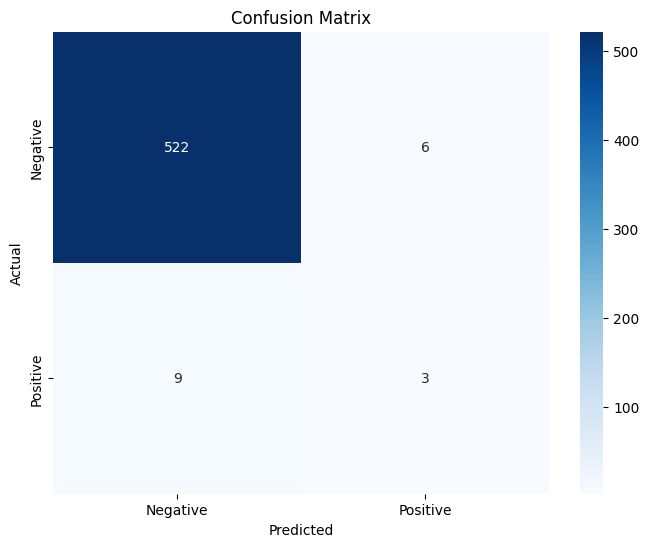

In [123]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_1d)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


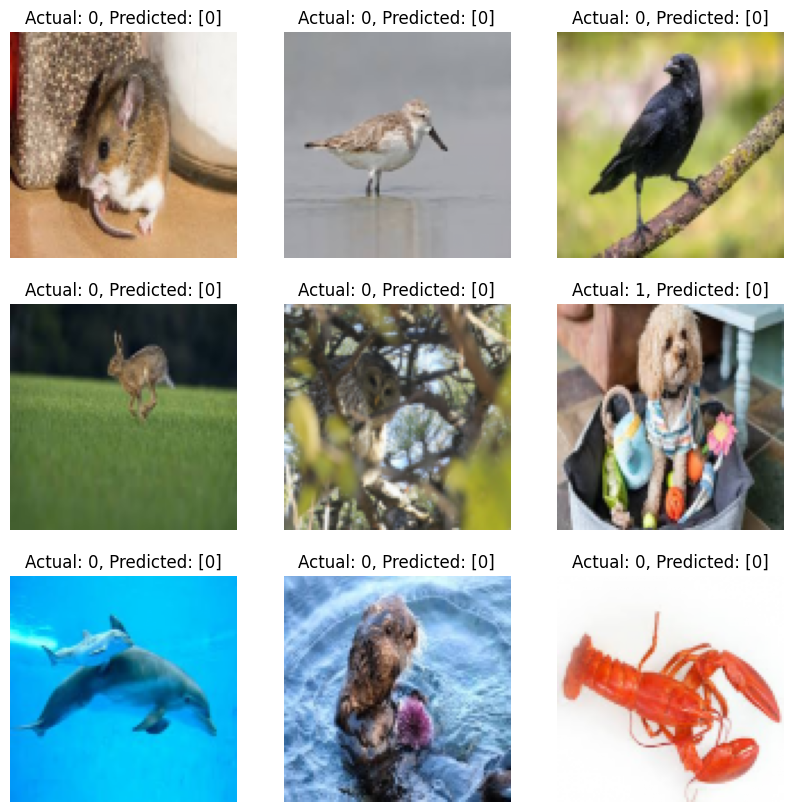

In [107]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i]*255)
    ax.axis('off')
    ax.set_title(f'Actual: {y_test[i]}, Predicted: {y_pred[i]}')
plt.show()

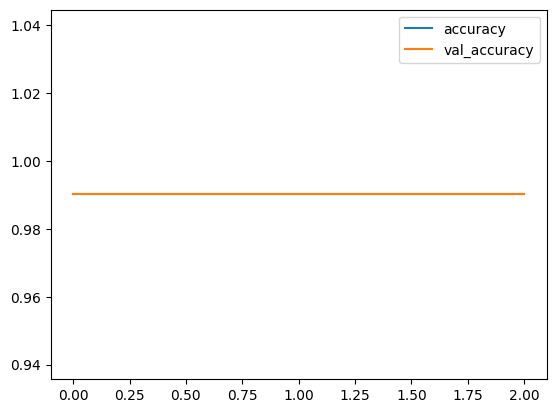

In [108]:
history_df=pd.DataFrame(history.history)
history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()

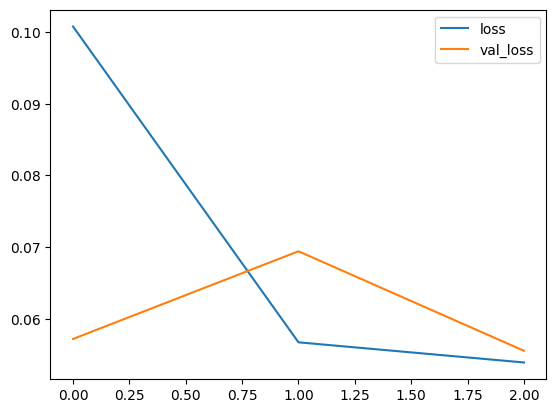

In [109]:
history_df=pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
plt.show()

# One vs rest classification on a smaller dataset to prevent high bias(outliers)

In [18]:
def prepare_dataset(data_dir):
    X = []
    y = []
    labels = os.listdir(data_dir)
    for label in ['snake','shark','horse','antelope','hamster','woodpecker','eagle']:
            label_dir = os.path.join(data_dir, label)
            image_files = os.listdir(label_dir)
            for image_file in image_files:
                image_path = os.path.join(label_dir, image_file)
                image = mpimg.imread(image_path)
                resized_image = resize(image, (100, 100))  # Resize to desired dimensions
                X.append(resized_image)
                y.append(label)
            print(label)
    return np.array(X), np.array(y)

# Define the path to the dataset directory
dataset_dir = "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals"

# Prepare the dataset
X, y = prepare_dataset(dataset_dir)





snake
shark
horse
antelope
hamster
woodpecker
eagle


In [19]:
# Define the target animal name
target_animal_name = 'shark'

# Get the index of the target animal name from the labels array
target_class_index = np.where(y == target_animal_name)
target_class_index

(array([ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
         73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
         86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
         99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119]),)

In [20]:
# Convert labels to binary labels: 1 for the target class, 0 for all other classes
binary_labels = []
for i in range(len(y)):
    if np.isin(i, target_class_index):
        binary_labels.append(1)
    else:
        binary_labels.append(0)


In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, binary_labels, test_size=0.2, random_state=42)

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

## CNN 

In [22]:
from keras import models, layers

def build_custom_cnn(input_shape):
    model = models.Sequential([
#         2D convolutional layer with 32 filters, each with a 3x3 kernel size, ReLU activation function
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
#         MaxPooling size (2X2) to reduce spatial dimension
        layers.MaxPooling2D((2, 2)),
#         normalizes the activations of the previous layer to stabilize and accelerate the training process.
        layers.BatchNormalization(),
#         Drop out at rate of 0.2 to prevent overfitting
        layers.Dropout(0.2),
#         2D convolutional layer with 64 filters, each with a 3x3 kernel size, ReLU activation function
        layers.Conv2D(128, (3, 3), activation='relu'),
#         flattens the input into a 1D array, preparing it for the fully connected layers
        layers.Flatten(),
#         adds a fully connected dense layer with 64 units and ReLU activation function.
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # One neuron for one vs rest classification
    ])
    return model

In [23]:
# Create the model
model = build_custom_cnn((100, 100, 3))
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 49, 49, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 282752)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    36,192,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,268,417 (138.35 MB)

 Trainable params: 36,268,289 (138.35 MB)

 Non-trainable params: 128 (512.00 B)

In [24]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## 3 Fold cross validation

In [25]:
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import ModelCheckpoint
import numpy as np
import os
# Define the number of folds
n_splits = 3

# Initialize StratifiedKFold with 3 folds
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation results
accuracy_scores = []
loss_scores = []

# Perform 3-fold cross-validation
for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train), 1):
    print(f"Fold {fold}:")
    print("Training samples:", len(train_index))
    print("Validation samples:", len(val_index))
    
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = np.array(y_train)[train_index], np.array(y_train)[val_index]
    
    # Create the model
    model = build_custom_cnn((100, 100, 3))
    
    # Define callbacks
    checkpoint = ModelCheckpoint(f'best_model_fold_{fold}.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model on the current fold
    history = model.fit(X_train_fold, y_train_fold, epochs=3, batch_size=16, 
                        validation_data=(X_val_fold, y_val_fold), callbacks=[checkpoint], verbose=1)
    
   

    # Check if the model checkpoint file exists before loading it
    checkpoint_filename = f'best_model_fold_{fold}.h5'
    if os.path.exists(checkpoint_filename):
        model.load_weights(checkpoint_filename)
    else:
        print(f"Model checkpoint '{checkpoint_filename}' not found.")

    # Evaluate the model on the validation set of the current fold
    loss, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)

    # Append the evaluation results to the respective lists
    loss_scores.append(loss)
    accuracy_scores.append(accuracy)

    print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}\n")

# Print the mean and standard deviation of the evaluation metrics across all folds
print("Mean Loss:", np.mean(loss_scores))
print("Standard Deviation of Loss:", np.std(loss_scores))
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Standard Deviation of Accuracy:", np.std(accuracy_scores))


Fold 1:
Training samples: 224
Validation samples: 112


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 671ms/step - accuracy: 0.8233 - loss: 0.3938
Epoch 1: val_accuracy improved from -inf to 0.86607, saving model to best_model_fold_1.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 846ms/step - accuracy: 0.8273 - loss: 0.3872 - val_accuracy: 0.8661 - val_loss: 0.3877
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 645ms/step - accuracy: 0.9035 - loss: 0.2314
Epoch 2: val_accuracy did not improve from 0.86607
14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 696ms/step - accuracy: 0.9040 - loss: 0.2298 - val_accuracy: 0.8661 - val_loss: 0.5432
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 647ms/step - accuracy: 0.9414 - loss: 0.1284
Epoch 3: val_accuracy did not improve from 0.86607
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 713ms/step - accuracy: 0.9418 - loss: 0.1277 - val_accuracy: 0.8661 - val_loss: 0.7905
Model checkpoint 'best_model_fold_1.h5' not found.
Validation Loss: 0.7839, Validation Accuracy: 0.8661

Fold 2:
Training samples: 224
Validation samples: 112
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 

In [27]:
y_test = np.array(y_test)

In [28]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.8013 - loss: 1.6329
Test Accuracy: 0.8214285969734192


In [52]:
y_pred_prob = model.predict(X_test*255)
print(y_pred_prob)
y_pred = (y_pred_prob > 0.1).astype(int)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_prob > 0.1))


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step
[[2.14550964e-04]
 [2.27680794e-05]
 [1.29989870e-02]
 [1.80045689e-07]
 [1.92371488e-03]
 [6.05940461e-01]
 [5.12921659e-04]
 [9.28332214e-04]
 [1.50915686e-04]
 [6.88179851e-01]
 [2.82652825e-01]
 [7.56359994e-01]
 [2.82379013e-04]
 [6.04615267e-03]
 [3.00601637e-03]
 [1.97238056e-04]
 [6.54085379e-05]
 [3.44911441e-02]
 [6.81268889e-03]
 [4.83259432e-09]
 [1.39911856e-06]
 [1.90047111e-04]
 [1.44782418e-04]
 [1.85250843e-04]
 [1.82523014e-04]
 [2.73748059e-02]
 [2.26029125e-03]
 [1.15363500e-05]
 [2.08343263e-05]
 [7.01173604e-01]
 [1.11141730e-04]
 [5.65993547e-01]
 [2.49179698e-06]
 [1.43437021e-04]
 [2.34712925e-08]
 [2.90453261e-08]
 [3.06343953e-13]
 [1.76540857e-06]
 [9.71576141e-04]
 [2.12011740e-01]
 [7.75405705e-01]
 [8.20747316e-01]
 [7.01280660e-04]
 [3.22987082e-10]
 [6.35499537e-01]
 [3.24539207e-02]
 [2.25666817e-03]
 [5.43520642e-08]
 [5.48927844e-01]
 [2.76534351e-10]
 [6.49439573e-01]
 [1.38959731e-04]
 [1.64343387e-01]
 [6.850

In [53]:
y_pred_1d = y_pred.reshape(-1)
y_pred_1d

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [54]:
y_pred_1d.shape

(84,)

In [55]:
# Compare y_pred and y_test element-wise to find matches
matches = (y_pred_1d == y_test)

# Count the number of matching values
num_matches = np.sum(matches)

print("Number of matching values between y_test and y_pred:", num_matches)

Number of matching values between y_test and y_pred: 77


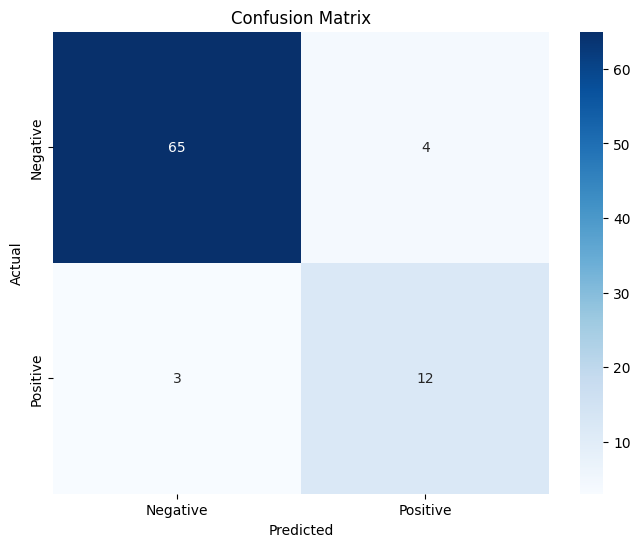

In [56]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_1d)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


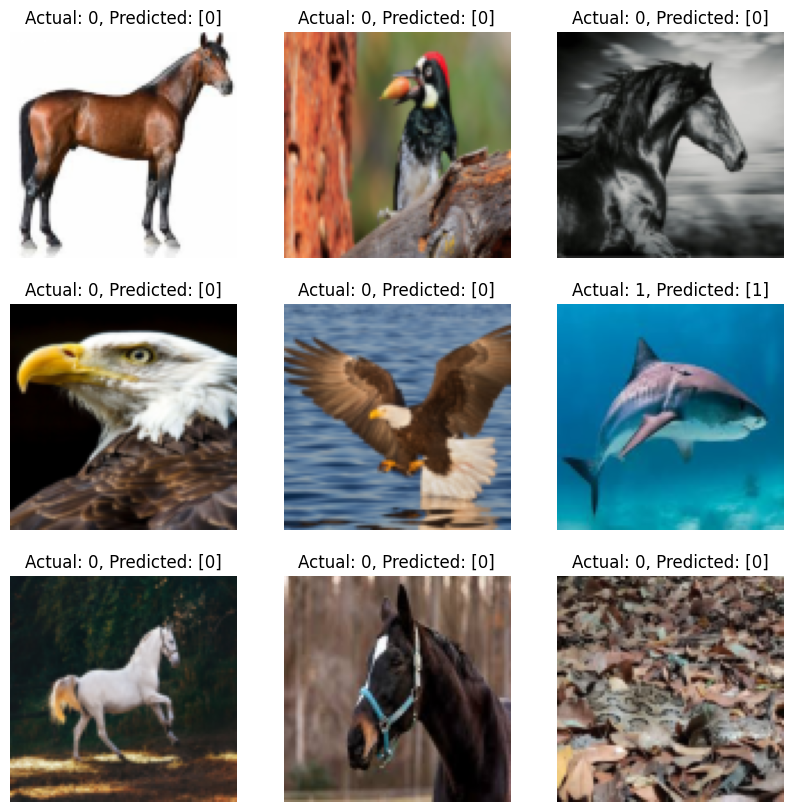

In [57]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i]*255)
    ax.axis('off')
    ax.set_title(f'Actual: {y_test[i]}, Predicted: {y_pred[i]}')
plt.show()

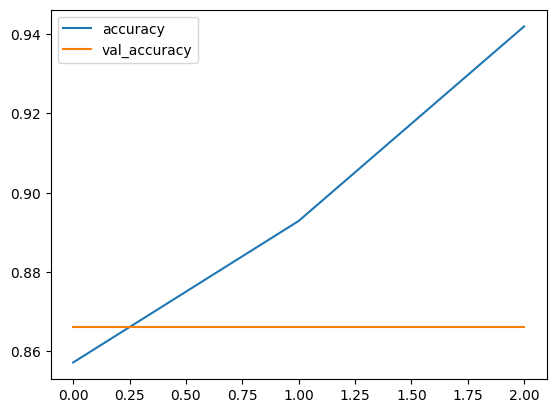

In [58]:
history_df=pd.DataFrame(history.history)
history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()

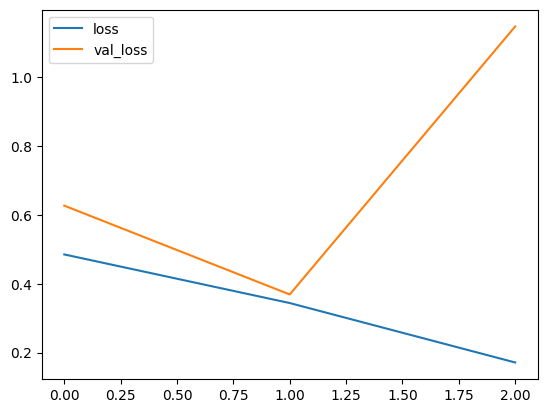

In [59]:
history_df=pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
plt.show()

# Binary Classification

## Preparing dataset for binary classification and Resizing images to same size (128 X128)

In [60]:
def prepare_binary_dataset(data_dir):
    X = []
    y = []
    labels = os.listdir(data_dir)
    for label in ['hedgehog','turtle']:
        
            label_dir = os.path.join(data_dir, label)
            image_files = os.listdir(label_dir)
            for image_file in image_files:
                image_path = os.path.join(label_dir, image_file)
                image = mpimg.imread(image_path)
                resized_image = resize(image, (128, 128))  # Resize to desired dimensions
                X.append(resized_image)
                y.append(label)
            print(label)
    return np.array(X), np.array(y)

In [61]:
# Define the path to the dataset directory
dataset_dir = "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals"
X_binary, y_binary = prepare_binary_dataset(dataset_dir)

hedgehog
turtle


In [62]:
y_binary.shape

(120,)

In [63]:
X_binary.shape

(120, 128, 128, 3)

In [237]:
y_binary

array(['hedgehog', 'hedgehog', 'hedgehog', 'hedgehog', 'hedgehog',
       'hedgehog', 'hedgehog', 'hedgehog', 'hedgehog', 'hedgehog',
       'hedgehog', 'hedgehog', 'hedgehog', 'hedgehog', 'hedgehog',
       'hedgehog', 'hedgehog', 'hedgehog', 'hedgehog', 'hedgehog',
       'hedgehog', 'hedgehog', 'hedgehog', 'hedgehog', 'hedgehog',
       'hedgehog', 'hedgehog', 'hedgehog', 'hedgehog', 'hedgehog',
       'hedgehog', 'hedgehog', 'hedgehog', 'hedgehog', 'hedgehog',
       'hedgehog', 'hedgehog', 'hedgehog', 'hedgehog', 'hedgehog',
       'hedgehog', 'hedgehog', 'hedgehog', 'hedgehog', 'hedgehog',
       'hedgehog', 'hedgehog', 'hedgehog', 'hedgehog', 'hedgehog',
       'hedgehog', 'hedgehog', 'hedgehog', 'hedgehog', 'hedgehog',
       'hedgehog', 'hedgehog', 'hedgehog', 'hedgehog', 'hedgehog',
       'turtle', 'turtle', 'turtle', 'turtle', 'turtle', 'turtle',
       'turtle', 'turtle', 'turtle', 'turtle', 'turtle', 'turtle',
       'turtle', 'turtle', 'turtle', 'turtle', 'turtle', 'turt

## 1-----> hedgehog ,0------>turtle

In [64]:
# Define the target animal name
target_animal_name = 'hedgehog'

# Get the index of the target animal name from the labels array
target_class_index = np.where(y_binary == target_animal_name)
target_class_index

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),)

In [69]:
# Convert labels to binary labels: 1 for the target class, 0 for all other classes
binary_labels = []
for i in range(len(y_binary)):
    if np.isin(i, target_class_index):
        binary_labels.append(1)
    else:
        binary_labels.append(0)



## **Train test split (80% ,20%) and regularising the pixel values bw 0 and 1**

In [70]:

# Split the binary dataset into training and testing sets
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, binary_labels, test_size=0.2, random_state=42)

# Normalize pixel values to [0, 1]
X_train_binary = X_train_binary / 255.0
X_test_binary = X_test_binary / 255.0

## CNN Model

In [74]:
from keras import models, layers

def build_custom_cnn_binary(input_shape):
    model = models.Sequential([
#         2D convolutional layer with 32 filters, each with a 3x3 kernel size, ReLU activation function
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
#         MaxPooling size (2X2) to reduce spatial dimension
        layers.MaxPooling2D((2, 2)),
#         normalizes the activations of the previous layer to stabilize and accelerate the training process.
        layers.BatchNormalization(),
#         Drop out at rate of 0.2 to prevent overfitting
        layers.Dropout(0.2),
#         2D convolutional layer with 64 filters, each with a 3x3 kernel size, ReLU activation function
        layers.Conv2D(128, (3, 3), activation='relu'),
#         flattens the input into a 1D array, preparing it for the fully connected layers
        layers.Flatten(),
#         adds a fully connected dense layer with 64 units and ReLU activation function.
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # One neuron for binary classification
    ])
    return model

In [75]:
from keras.layers import Input

# Define the input shape
input_shape = (128, 128, 3)

# Create the input layer
input_layer = Input(shape=input_shape)

# Create the rest of the model
binary_model = build_custom_cnn_binary(input_shape)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [79]:
y_train_binary = np.array(y_train_binary)
y_test_binary = np.array(y_test_binary)

In [80]:
y_train_binary.shape

(96,)

In [81]:
X_train_binary.shape

(96, 128, 128, 3)

## 3 Fold cross validation

In [95]:
# Compile the model for binary classification
binary_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

from sklearn.model_selection import StratifiedKFold
from keras.callbacks import ModelCheckpoint
import numpy as np
import os
# Define the number of folds
n_splits = 3

# Initialize StratifiedKFold with 3 folds
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation results
accuracy_scores = []
loss_scores = []

# Perform 3-fold cross-validation
for fold, (train_index, val_index) in enumerate(skf.split(X_train_binary, y_train_binary), 1):
    print(f"Fold {fold}:")
    print("Training samples:", len(train_index))
    print("Validation samples:", len(val_index))
    
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train_binary[train_index], X_train_binary[val_index]
    y_train_fold, y_val_fold = y_train_binary[train_index], y_train_binary[val_index]
    
    # Create the model
    model = build_custom_cnn_binary((128, 128, 3))
    
    # Define callbacks
    checkpoint = ModelCheckpoint(f'best_model_fold_{fold}.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model on the current fold
    history = model.fit(X_train_fold, y_train_fold, epochs=15, batch_size=16, 
                        validation_data=(X_val_fold, y_val_fold), callbacks=[checkpoint], verbose=1)
    
   

    # Check if the model checkpoint file exists before loading it
    checkpoint_filename = f'best_model_fold_{fold}.h5'
    if os.path.exists(checkpoint_filename):
        model.load_weights(checkpoint_filename)
    else:
        print(f"Model checkpoint '{checkpoint_filename}' not found.")

    # Evaluate the model on the validation set of the current fold
    loss, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)

    # Append the evaluation results to the respective lists
    loss_scores.append(loss)
    accuracy_scores.append(accuracy)

    print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}\n")

# Print the mean and standard deviation of the evaluation metrics across all folds
print("Mean Loss:", np.mean(loss_scores))
print("Standard Deviation of Loss:", np.std(loss_scores))
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Standard Deviation of Accuracy:", np.std(accuracy_scores))




Fold 1:
Training samples: 64
Validation samples: 32


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5391 - loss: 0.7960
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to best_model_fold_1.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5500 - loss: 0.8180 - val_accuracy: 0.5000 - val_loss: 0.6798
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6419 - loss: 0.5154
Epoch 2: val_accuracy did not improve from 0.50000
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6229 - loss: 0.5379 - val_accuracy: 0.5000 - val_loss: 0.6911
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8424 - loss: 0.4396
Epoch 3: val_accuracy did not improve from 0.50000
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8333 - loss: 0.4449 - val_accuracy: 0.5000 - val_loss: 0.7922
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7201 - loss: 0.5100
Epoch 4: val_accuracy did not improve from 0.50000
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7292 - loss: 0.4967 - val_accuracy: 0.5000

In [104]:
binary_test_loss, binary_test_accuracy = model.evaluate(X_test_binary, y_test_binary)
print("Binary Classification Test Accuracy:", binary_test_accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.5417 - loss: 0.6489
Binary Classification Test Accuracy: 0.5416666865348816


## As there are 2 classes hedgehog or turtle if prob(class 1(hedgehog)) >0.62 then it is class 1 else its not turtle(class2)

In [110]:
y_pred_prob = model.predict(X_test_binary)
print(y_pred_prob)
y_pred_binary = (y_pred_prob > 0.62).astype(int)
from sklearn.metrics import classification_report
print(y_pred_binary)
print(classification_report(y_test_binary, y_pred_binary))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
[[0.67157596]
 [0.64770013]
 [0.6477789 ]
 [0.6388418 ]
 [0.68118185]
 [0.613487  ]
 [0.5929487 ]
 [0.55499154]
 [0.7251308 ]
 [0.56897163]
 [0.62841034]
 [0.6188024 ]
 [0.647744  ]
 [0.7028982 ]
 [0.57293993]
 [0.54667073]
 [0.5925576 ]
 [0.60055745]
 [0.61315846]
 [0.6001566 ]
 [0.5840111 ]
 [0.60524434]
 [0.6531507 ]
 [0.60839015]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.77      0.87        13

    accuracy                           0.88        24
   macro avg       0.89      0.88      0.87        24
weighted avg       0.90      0.88      0.87        24



In [111]:
y_pred_1d = y_pred_binary.reshape(-1)
y_pred_1d

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0])

In [112]:
y_test_binary

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0])

In [113]:
# Compare y_pred and y_test element-wise to find matches
matches = (y_pred_1d == y_test_binary)

# Count the number of matching values
num_matches = np.sum(matches)

print("Number of matching values between y_test and y_pred:", num_matches)

Number of matching values between y_test and y_pred: 21


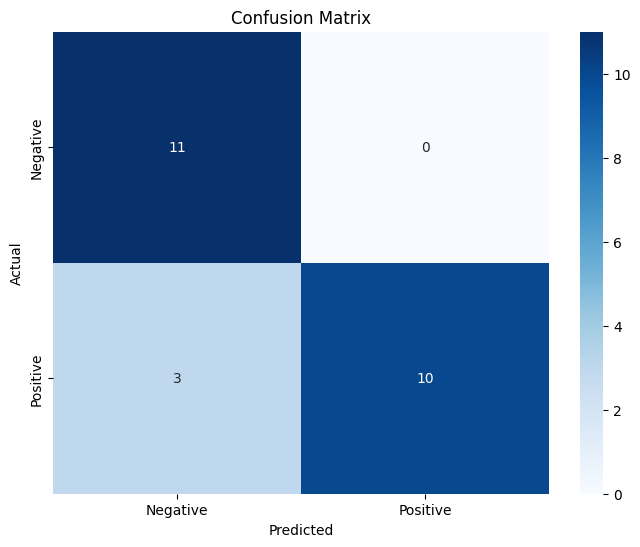

In [114]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test_binary, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [115]:
X_test_binary.shape

(24, 128, 128, 3)

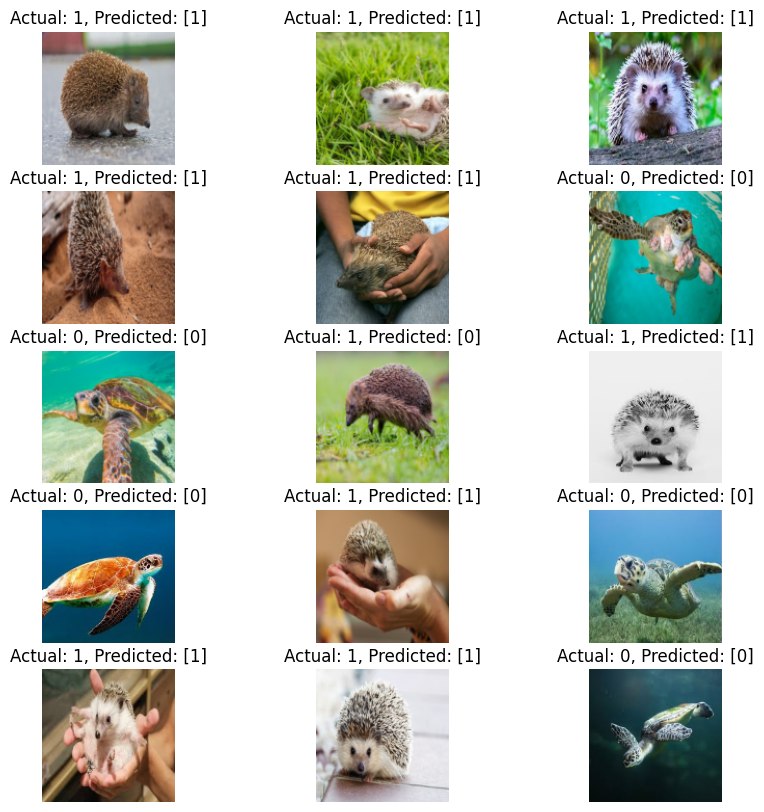

In [119]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test_binary[i]*255)
    ax.axis('off')
    ax.set_title(f'Actual: {y_test_binary[i]}, Predicted: {y_pred_binary[i]}')
plt.show()


Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5646 - loss: 0.7572 - val_accuracy: 0.5000 - val_loss: 0.6903
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8519 - loss: 0.3794 - val_accuracy: 0.6000 - val_loss: 0.6778
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8764 - loss: 0.2610 - val_accuracy: 0.3500 - val_loss: 0.7014
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9129 - loss: 0.2014 - val_accuracy: 0.6500 - val_loss: 0.7056
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8998 - loss: 0.3682 - val_accuracy: 0.3500 - val_loss: 1.0740
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8338 - loss: 0.3858 - val_accuracy: 0.6500 - val_loss: 0.6773
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9164 - loss: 0.1991 - val_accuracy: 0.8000 - val_loss: 0.6628
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 1.0000 - loss: 0.0862 - val_accuracy: 0.3500 - val_loss: 0.8598
Epoch 9/15
5

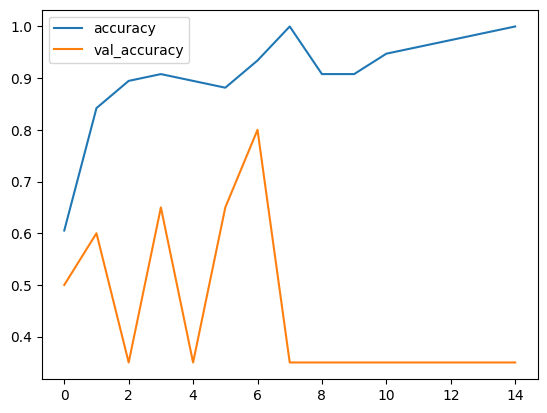

In [120]:
# Train the model and store its history
history = binary_model.fit(X_train_binary, y_train_binary, epochs=15, batch_size=16, validation_split=0.2)

# Convert the history to a DataFrame
history_df = pd.DataFrame(history.history)

# Plot the accuracy and validation accuracy
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()


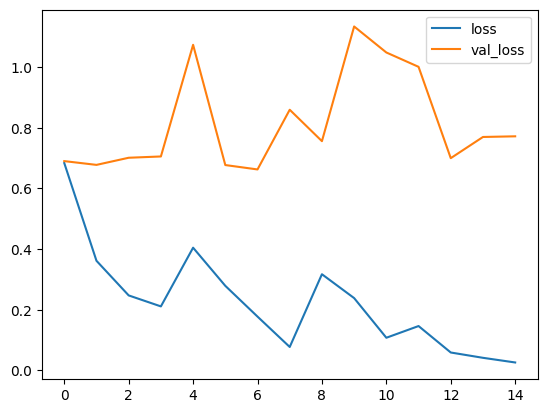

In [121]:
history_df=pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
plt.show()

# 5-class classification

## Preparing dataset for 5 class classification and Resizing images to same size (100 X100)

In [45]:
def prepare_five_class_dataset(data_dir):
    X = []
    y = []
    labels = os.listdir(data_dir)
    # Define the desired labels
    desired_labels = ['dog','gorilla','shark','woodpecker','eagle']
    for label in desired_labels:
        label_dir = os.path.join(data_dir, label)
        image_files = os.listdir(label_dir)
        for image_file in image_files:
            image_path = os.path.join(label_dir, image_file)
            image = mpimg.imread(image_path)
            resized_image = resize(image, (100, 100))  # Resize to desired dimensions
            X.append(resized_image)
            y.append(label)
        print(label)
    return np.array(X), np.array(y)

# Define the path to the dataset directory
dataset_dir = "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals"

# Prepare the dataset
X_5class, y_5class = prepare_five_class_dataset(dataset_dir)


dog
gorilla
shark
woodpecker
eagle


In [47]:
y_5class

array(['dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
       'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
       'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
       'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
       'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
       'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
       'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'gorilla', 'gorilla',
       'gorilla', 'gorilla', 'gorilla', 'gorilla', 'gorilla', 'gorilla',
       'gorilla', 'gorilla', 'gorilla', 'gorilla', 'gorilla', 'gorilla',
       'gorilla', 'gorilla', 'gorilla', 'gorilla', 'gorilla', 'gorilla',
       'gorilla', 'gorilla', 'gorilla', 'gorilla', 'gorilla', 'gorilla',
       'gorilla', 'gorilla', 'gorilla', 'gorilla', 'gorilla', 'gorilla',
       'gorilla', 'gorilla', 'gorilla', 'gorilla', 'gorilla', 'gorilla',
       'gorilla', 'gorilla', 'gorilla', 'gorilla', 'gorilla', 'gorilla'

In [48]:
# Define the target animal name
labels =[]
target_animal_name = ['dog','gorilla','shark','woodpecker','eagle']
count=0
for i in target_animal_name:
    # Get the index of the target animal name from the labels array
    target_class_index = np.where(y_5class == i)
    print(target_class_index)
    for j in range(len(y_5class)):
        if np.isin(j, target_class_index):
            labels.append(count)
    count+=1

labels = np.array(labels)
labels

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59]),)
(array([ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119]),)
(array([120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179]),)
(array([180, 181, 182, 183, 184, 185, 186, 187, 18

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [49]:
labels.shape

(300,)

In [50]:
X_5class.shape

(300, 100, 100, 3)

## **Train test split (90% ,10%) and regularising the pixel values bw 0 and 1**

In [51]:

# Split the dataset into training and testing sets
X_train_5class, X_test_5class, y_train_5class, y_test_5class = train_test_split(X_5class, labels, test_size=0.1, random_state=42)
# Normalize pixel values to [0, 1]
X_train = X_train_5class / 255.0
X_test = X_test_5class / 255.0

In [52]:
y_train_5class

array([0, 2, 0, 0, 3, 1, 0, 1, 0, 1, 1, 1, 4, 1, 1, 1, 3, 3, 1, 3, 3, 2,
       3, 1, 4, 4, 1, 1, 3, 0, 3, 0, 0, 3, 2, 0, 0, 4, 0, 3, 1, 2, 3, 3,
       2, 4, 1, 1, 1, 4, 2, 2, 0, 2, 1, 1, 1, 1, 0, 0, 3, 1, 1, 3, 0, 0,
       2, 2, 4, 1, 3, 1, 0, 3, 4, 3, 2, 0, 3, 1, 2, 4, 1, 4, 4, 1, 2, 4,
       3, 3, 0, 2, 3, 2, 2, 4, 0, 2, 3, 4, 2, 1, 2, 1, 4, 4, 2, 2, 2, 0,
       1, 2, 2, 2, 3, 4, 2, 1, 0, 1, 4, 1, 3, 2, 4, 4, 3, 1, 3, 1, 3, 2,
       0, 0, 0, 2, 4, 4, 2, 0, 1, 3, 4, 0, 1, 4, 2, 0, 4, 2, 3, 0, 4, 4,
       1, 4, 4, 2, 1, 0, 1, 2, 3, 3, 4, 0, 4, 4, 0, 3, 0, 2, 0, 3, 2, 3,
       4, 2, 1, 2, 2, 4, 0, 1, 4, 1, 0, 4, 2, 0, 2, 4, 3, 2, 0, 4, 1, 1,
       3, 3, 0, 4, 4, 4, 3, 0, 0, 1, 4, 3, 4, 3, 2, 0, 3, 2, 3, 3, 4, 0,
       1, 0, 2, 0, 2, 1, 0, 1, 3, 0, 1, 0, 4, 0, 1, 2, 4, 2, 4, 4, 0, 0,
       2, 3, 4, 3, 2, 0, 0, 3, 4, 0, 2, 4, 3, 4, 2, 2, 2, 1, 1, 3, 2, 4,
       0, 3, 1, 1, 4, 1])

## CNN Model

In [53]:
from keras import models, layers

def build_custom_cnn_5class(input_shape):
    model = models.Sequential([
#         2D convolutional layer with 32 filters, each with a 3x3 kernel size, ReLU activation function
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
#         MaxPooling size (2X2) to reduce spatial dimension
        layers.MaxPooling2D((2, 2)),
#         normalizes the activations of the previous layer to stabilize and accelerate the training process.
        layers.BatchNormalization(),
#         Drop out at rate of 0.2 to prevent overfitting
        layers.Dropout(0.2),
#         2D convolutional layer with 64 filters, each with a 3x3 kernel size, ReLU activation function
        layers.Conv2D(128, (3, 3), activation='relu'),
#         flattens the input into a 1D array, preparing it for the fully connected layers
        layers.Flatten(),
#         adds a fully connected dense layer with 64 units and ReLU activation function.
        layers.Dense(128, activation='relu'),
        layers.Dense(5, activation='sigmoid')  # 5 neurons for 5class classification
    ])
   
    
    return model


In [54]:
model_5class = build_custom_cnn_5class((100, 100, 3))
model_5class.summary()
model_5class.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 98, 98, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 49, 49, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 282752)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │    36,192,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,268,933 (138.35 MB)

 Trainable params: 36,268,805 (138.35 MB)

 Non-trainable params: 128 (512.00 B)

## 3 Fold cross validation

In [56]:
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import ModelCheckpoint
import numpy as np
import os
# Define the number of folds
n_splits = 3

# Initialize StratifiedKFold with 3 folds
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation results
accuracy_scores = []
loss_scores = []

# Perform 3-fold cross-validation
for fold, (train_index, val_index) in enumerate(skf.split(X_train_5class, y_train_5class), 1):
    print(f"Fold {fold}:")
    print("Training samples:", len(train_index))
    print("Validation samples:", len(val_index))
    
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train_5class[train_index], X_train_5class[val_index]
    y_train_fold, y_val_fold = np.array(y_train_5class)[train_index], np.array(y_train_5class)[val_index]
    
    # Create the model
    model_5class = build_custom_cnn_5class((100, 100, 3))
    
    # Define callbacks
    checkpoint = ModelCheckpoint(f'best_model_fold_{fold}.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

    
    # Compile the model
    model_5class.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model on the current fold
    history = model_5class.fit(X_train_fold, y_train_fold, epochs=15, batch_size=16, 
                        validation_data=(X_val_fold, y_val_fold), callbacks=[checkpoint], verbose=1)
    
   

    # Check if the model checkpoint file exists before loading it
    checkpoint_filename = f'best_model_fold_{fold}.h5'
    if os.path.exists(checkpoint_filename):
        model_5class.load_weights(checkpoint_filename)
    else:
        print(f"Model checkpoint '{checkpoint_filename}' not found.")

    # Evaluate the model on the validation set of the current fold
    loss, accuracy = model_5class.evaluate(X_val_fold, y_val_fold, verbose=0)

    # Append the evaluation results to the respective lists
    loss_scores.append(loss)
    accuracy_scores.append(accuracy)

    print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}\n")

# Print the mean and standard deviation of the evaluation metrics across all folds
print("Mean Loss:", np.mean(loss_scores))
print("Standard Deviation of Loss:", np.std(loss_scores))
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Standard Deviation of Accuracy:", np.std(accuracy_scores))




Fold 1:
Training samples: 180
Validation samples: 90


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 643ms/step - accuracy: 0.2322 - loss: 50.4263
Epoch 1: val_accuracy improved from -inf to 0.30000, saving model to best_model_fold_1.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 877ms/step - accuracy: 0.2340 - loss: 49.5218 - val_accuracy: 0.3000 - val_loss: 2.5441
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 643ms/step - accuracy: 0.5185 - loss: 6.7936
Epoch 2: val_accuracy did not improve from 0.30000
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 702ms/step - accuracy: 0.5171 - loss: 6.6727 - val_accuracy: 0.2889 - val_loss: 1.5437
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 645ms/step - accuracy: 0.6750 - loss: 2.3196
Epoch 3: val_accuracy did not improve from 0.30000
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 695ms/step - accuracy: 0.6791 - loss: 2.2754 - val_accuracy: 0.2111 - val_loss: 1.5718
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 701ms/step - accuracy: 0.8019 - loss: 0.8055
Epoch 4: val_accuracy did not improve from 0.30000
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 756ms/step - accuracy: 0.

In [57]:
test_loss_5class, test_accuracy_5class = model_5class.evaluate(X_test_5class, y_test_5class)
print("5-Class Classification Test Accuracy:", test_accuracy_5class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.6333 - loss: 1.3576
5-Class Classification Test Accuracy: 0.6333333253860474


## As there are 5 classes :['dog','gorilla','shark','woodpecker','eagle'] ,the prob of whichever class id max is the predicted class

In [58]:
y_test_5class

array([3, 4, 2, 0, 3, 3, 3, 1, 0, 2, 3, 0, 3, 0, 3, 3, 4, 3, 2, 2, 1, 1,
       4, 4, 1, 0, 4, 4, 2, 3])

In [59]:
from sklearn.metrics import classification_report
y_pred_prob = model_5class.predict(X_test_5class)
# Get the class predictions by selecting the class with the highest probability for each sample
print(y_pred_prob)
y_pred = np.argmax(y_pred_prob, axis=1)
print(y_pred.shape)
print(y_test_5class.shape)
# Print classification report
print(classification_report(y_test_5class, y_pred, target_names= ['dog','gorilla','shark','woodpecker','eagle']))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
[[0.53394496 0.46763742 0.44700396 0.5674729  0.49159053]
 [0.53408605 0.507623   0.50461936 0.52679414 0.512213  ]
 [0.6915696  0.63389677 0.7101245  0.57385397 0.5245893 ]
 [0.82905555 0.465917   0.2624779  0.724781   0.62342364]
 [0.497858   0.5148697  0.49621332 0.5045808  0.50692666]
 [0.67793626 0.47354272 0.68017703 0.5316162  0.55919117]
 [0.5228486  0.5040254  0.50091666 0.5074186  0.5031682 ]
 [0.5073117  0.5088955  0.4969877  0.49870494 0.501528  ]
 [0.5327982  0.47214743 0.5366055  0.52703995 0.50432795]
 [0.75242394 0.34134078 0.99961126 0.3206577  0.8259309 ]
 [0.5167176  0.54889125 0.50583804 0.5010844  0.5150901 ]
 [0.56044406 0.4741426  0.50398326 0.51020557 0.48226035]
 [0.50197065 0.49251747 0.4900535  0.54069763 0.473116  ]
 [0.5477908  0.4731817  0.49692568 0.5098262  0.4852916 ]
 [0.6646911  0.51251274 0.52415305 0.55827415 0.5094074 ]
 [0.542909   0.48891613 0.504754   0.5184407  0.49947718]
 [0.510482   0.569342   0.5256748

In [60]:
y_pred

array([3, 0, 2, 0, 1, 2, 0, 1, 2, 2, 1, 0, 3, 0, 0, 0, 4, 3, 2, 2, 1, 1,
       4, 4, 1, 0, 1, 0, 2, 4])

In [61]:
y_test_5class.shape

(30,)

In [62]:
# Compare y_pred and y_test element-wise to find matches
matches = (y_pred == y_test_5class)

# Count the number of matching values
num_matches = np.sum(matches)

print("Number of matching values between y_test and y_pred:", num_matches)

Number of matching values between y_test and y_pred: 19


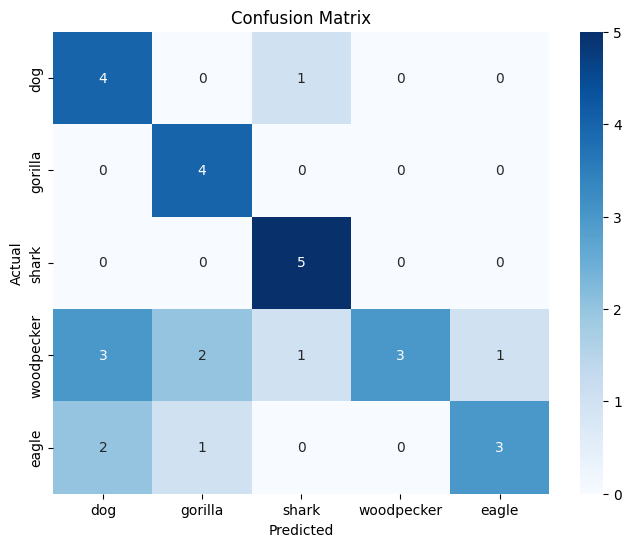

In [65]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test_5class, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=['dog','gorilla','shark','woodpecker','eagle'], yticklabels=['dog','gorilla','shark','woodpecker','eagle'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


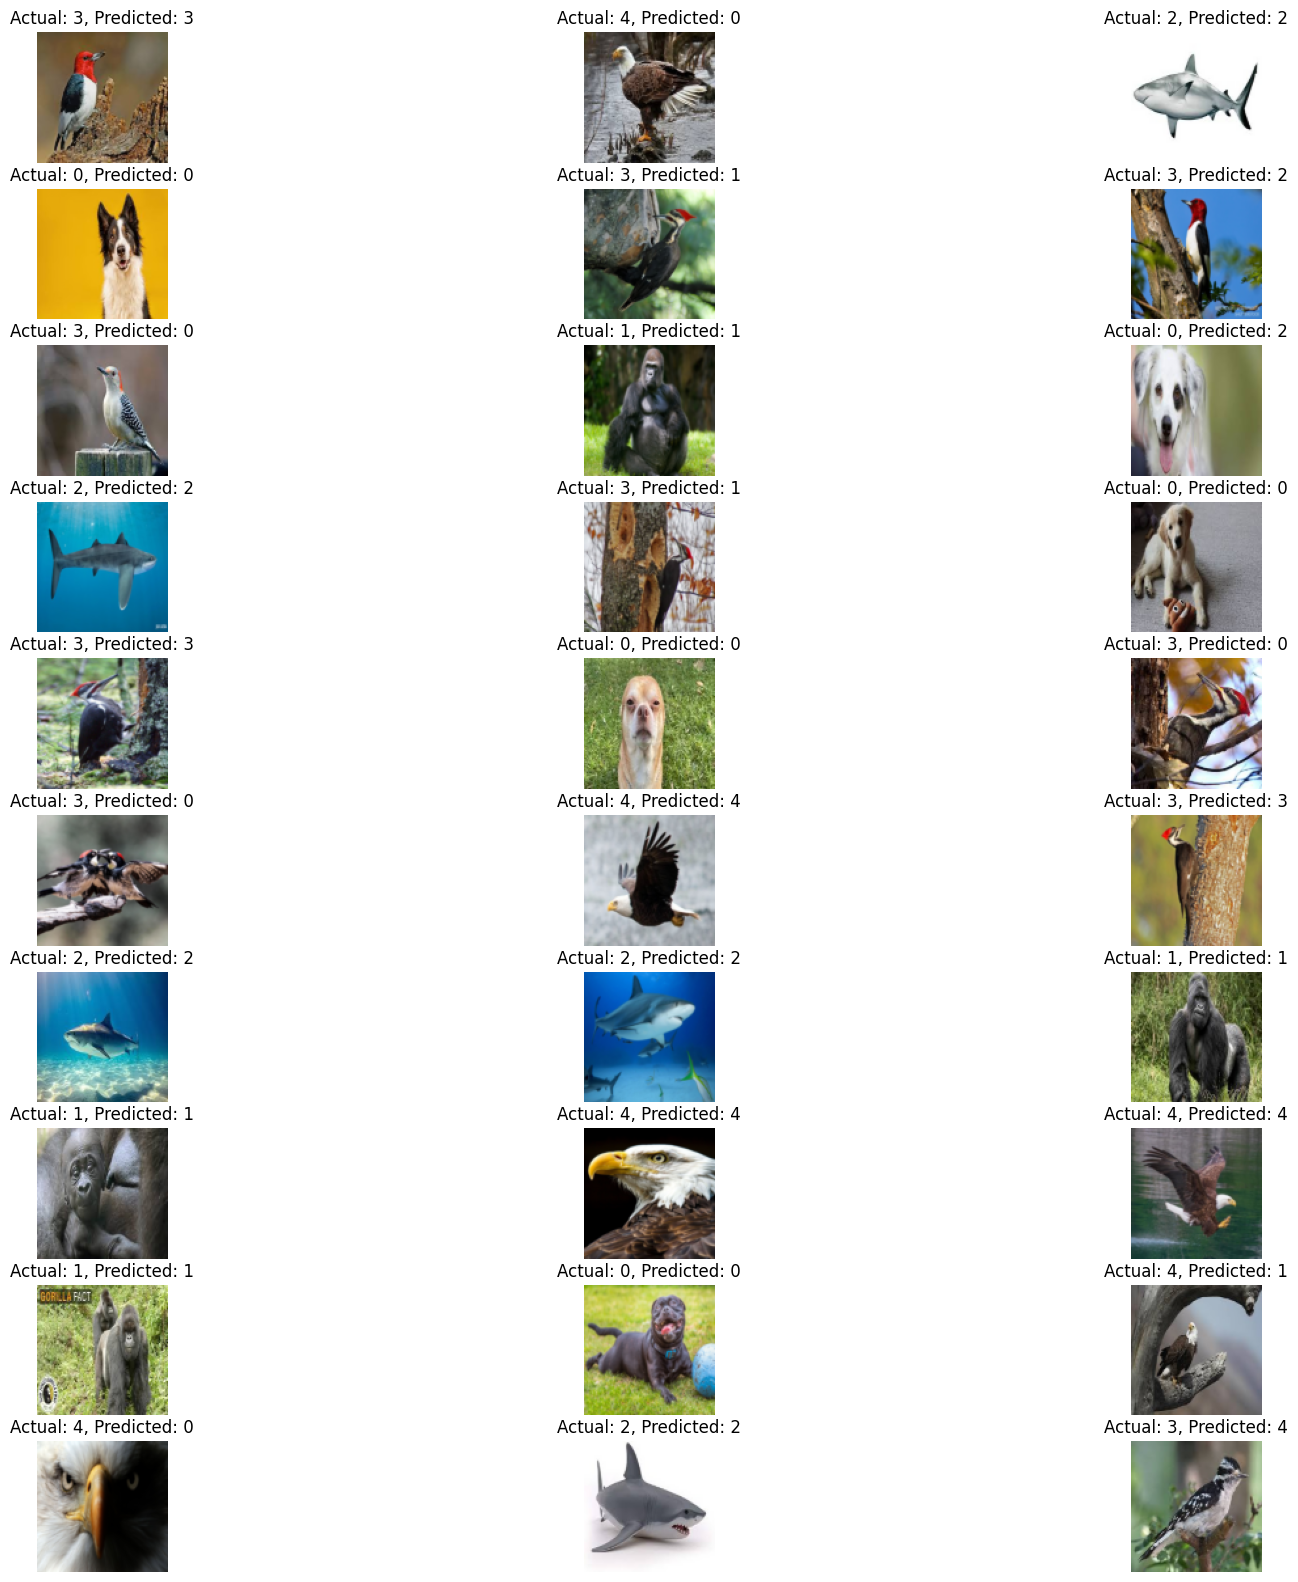

In [66]:
fig, axes = plt.subplots(10, 3, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test_5class[i])
    ax.axis('off')
    ax.set_title(f'Actual: {y_test_5class[i]}, Predicted: {y_pred[i]}')
plt.show()

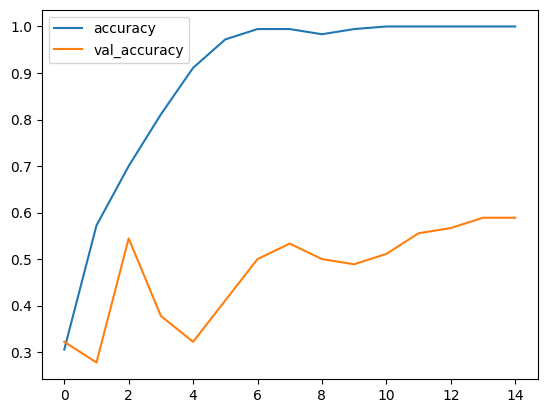

In [68]:
history_df=pd.DataFrame(history.history)
history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()

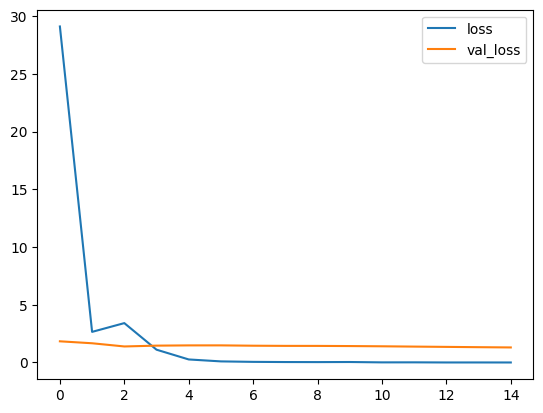

In [69]:
history_df=pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
plt.show()

# Some basic operations of CNN from scratch in an attempt to understand CNN better

## Image array

In [8]:
# Randomly initialize array with values between 0 and 1
img_array = np.random.rand(128, 128, 3)

# Print the randomly initialized array
print(img_array)

[[[0.38434055 0.28742692 0.61504268]
  [0.65402319 0.78071339 0.11787047]
  [0.01830577 0.58319846 0.89004912]
  ...
  [0.10102635 0.52989867 0.27811618]
  [0.87682376 0.67198517 0.98938833]
  [0.90032351 0.64415566 0.79013026]]

 [[0.18656791 0.40046076 0.93907491]
  [0.16482992 0.22162331 0.65662894]
  [0.03115124 0.05598911 0.63818506]
  ...
  [0.84842993 0.8621212  0.49740755]
  [0.9760185  0.43396428 0.16092392]
  [0.62016614 0.40076074 0.87172786]]

 [[0.49647203 0.02637618 0.27296637]
  [0.95956486 0.40229237 0.17250471]
  [0.01761362 0.64206189 0.72495412]
  ...
  [0.28358512 0.30889595 0.8016642 ]
  [0.35714476 0.35776286 0.42205101]
  [0.04823198 0.88897941 0.9469747 ]]

 ...

 [[0.11867754 0.8646949  0.46664021]
  [0.68925032 0.54367867 0.89937018]
  [0.39132542 0.03870858 0.09836308]
  ...
  [0.13145856 0.79087516 0.50469319]
  [0.77723822 0.55316319 0.28586997]
  [0.88161825 0.51078991 0.56878774]]

 [[0.7761118  0.16567853 0.72344989]
  [0.00568335 0.06264728 0.1042179 ]


## Convolving the img_array with the kernal to get output array as 32 @(126,126) arrays for stride = 1 [(128-3/s)+1 = output size,(where s is the stride] 

In [21]:
# Randomly initialize kernels
kernels = [np.random.rand(3, 3) for i in range(32)]
# Initialize image array
image = img_array[:,:,0]
print(image)
print(image.shape)
# Initialize output feature map
output_feature_map = np.zeros((128 - 3 + 1, 128 - 3 + 1, len(kernels)))

# Perform convolution
for i in range(128 - 3 + 1):  # Slide the kernel vertically
    for j in range(128 - 3 + 1):  # Slide the kernel horizontally
        for k, kernel in enumerate(kernels):  # Iterate over each kernel
            # Extract the region from the image
            image_region = image[i:i+3, j:j+3]
            # Perform element-wise multiplication and summation
            output_feature_map[i, j, k] = np.sum(image_region * kernel)

# Print the output feature map shape
print("Output Feature Map Shape:", output_feature_map.shape)
print(output_feature_map)

[[0.38434055 0.65402319 0.01830577 ... 0.10102635 0.87682376 0.90032351]
 [0.18656791 0.16482992 0.03115124 ... 0.84842993 0.9760185  0.62016614]
 [0.49647203 0.95956486 0.01761362 ... 0.28358512 0.35714476 0.04823198]
 ...
 [0.11867754 0.68925032 0.39132542 ... 0.13145856 0.77723822 0.88161825]
 [0.7761118  0.00568335 0.07019253 ... 0.20557619 0.32924783 0.08014359]
 [0.71126533 0.33492343 0.91490653 ... 0.27900699 0.60878176 0.91598212]]
(128, 128)
Output Feature Map Shape: (126, 126, 32)
[[[1.34378071 2.13414861 2.07588851 ... 1.53057598 1.46212377 2.01885979]
  [1.61273291 1.70735428 1.29783554 ... 1.14378088 2.24600788 2.17686317]
  [1.4853828  2.26377169 1.84814815 ... 2.11622852 1.7445973  2.13108052]
  ...
  [1.76965688 2.922213   2.25933847 ... 2.24078072 1.96251792 2.8079057 ]
  [2.30486481 2.96368913 2.53218413 ... 2.83277655 2.98918094 3.48938201]
  [2.2489787  3.05315151 3.21435393 ... 3.64036468 3.09721354 3.50951548]]

 [[1.41876495 2.3067156  2.35008206 ... 1.98796438 1

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D

# Define the input shape
input_shape = (128, 128, 1)

# Create the model
model = Sequential()

# Add Conv2D layer with correct input shape
model.add(Conv2D(32, (3, 3), input_shape=input_shape))

# Print model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 320 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
max_pooled_feature_map = np.zeros((63, 63, 32))

# Perform max pooling
for k in range(output_feature_map.shape[2]):  # Iterate over each channel
    for i in range(0, output_feature_map.shape[0], 2):  # Slide the window vertically with stride 2
        for j in range(0, output_feature_map.shape[1], 2):  # Slide the window horizontally with stride 2
            # Extract the region from the convolved feature map
            region = output_feature_map[i:i+2, j:j+2, k]
            # Compute the maximum value within the region
            max_value = np.max(region)
            # Assign the maximum value to the corresponding position in the max pooled feature map
            max_pooled_feature_map[i//2, j//2, k] = max_value

# Print the shape of the max pooled feature map
print("Max Pooled Feature Map Shape:", max_pooled_feature_map.shape)
print(max_pooled_feature_map)

Max Pooled Feature Map Shape: (63, 63, 32)
[[[1.84353449 2.3067156  2.35008206 ... 1.98796438 2.24600788 2.737231  ]
  [2.07870915 3.05484833 2.43981518 ... 2.49275605 3.10006072 2.83855262]
  [1.52650646 2.43949761 2.25859212 ... 2.62151031 2.74540064 2.39013703]
  ...
  [2.10046561 2.96253093 2.95879111 ... 2.95041752 2.9775594  3.19775192]
  [2.55809605 3.6840815  3.337965   ... 3.20543914 3.93231531 4.09793798]
  [2.80309029 3.43408538 3.44177018 ... 3.64036468 3.70855581 4.08429021]]

 [[2.33583433 3.59922242 3.27775403 ... 3.00809522 3.19633115 3.58691499]
  [1.57897698 2.70364171 2.06471218 ... 2.33697347 2.37004223 2.62359586]
  [1.86199928 2.52876737 2.5087657  ... 2.60926714 2.31237501 3.0331826 ]
  ...
  [2.35152426 2.91919159 2.76860478 ... 2.4402582  2.59266778 3.29709552]
  [2.61916608 4.14336854 3.39973927 ... 3.4222421  3.35140021 4.11715377]
  [2.22269148 3.13049774 3.01386106 ... 3.04807113 2.87880368 3.14791314]]

 [[2.82633984 3.34157185 3.2558602  ... 2.88356279 3.

In [32]:
from keras.layers import MaxPooling2D
input_shape = (128, 128, 1)

# Create the model
model = Sequential()

# Add Conv2D layer with correct input shape
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(MaxPooling2D((2,2)))
# Print model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 320 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Randomly initialize kernels
kernels = [np.random.rand(3, 3) for i in range(64)]
output_feature_map = np.zeros((63 - 3 + 1, 63 - 3 + 1, len(kernels)))
max_pooled_feature_map = max_pooled_feature_map[:,:,0]
# Perform convolution
for i in range(63 - 3 + 1):  # Slide the kernel vertically
    for j in range( 63- 3 + 1):  # Slide the kernel horizontally
        for k, kernel in enumerate(kernels):  # Iterate over each kernel
            # Extract the region from the image
            image_region = max_pooled_feature_map[i:i+3, j:j+3]
            # Perform element-wise multiplication and summation
            output_feature_map[i, j, k] = np.sum(image_region * kernel)

# Print the output feature map shape
print("Output Feature Map Shape:", output_feature_map.shape)
print(output_feature_map)

Output Feature Map Shape: (61, 61, 64)
[[[ 8.40518216  8.33589615  9.03017454 ... 10.0707963  11.16813912
    8.78453647]
  [ 8.08807334  7.05120706  8.63032402 ...  9.5997104  10.10392018
    8.45022913]
  [ 8.22315437  7.66198326  8.40331539 ...  9.87158082 10.6073429
    8.30365772]
  ...
  [ 9.04450527  8.54962134  8.9733333  ... 11.17693383 11.75169724
    8.98009426]
  [ 9.8955772   8.96478589 10.11215046 ... 12.38661584 12.60495601
    9.9527897 ]
  [10.30098977  8.98625772 10.79382595 ... 12.79292008 12.6972904
   10.78317869]]

 [[ 9.42802697  9.16190097 10.22085769 ... 11.74486149 12.02635292
    8.85777305]
  [ 8.64581649  8.08927103  9.53102869 ... 10.3938507  10.87319225
    8.7645477 ]
  [ 8.29310466  8.31973294  9.01785201 ... 10.34862588 11.00562286
    8.3543589 ]
  ...
  [ 8.98718875  8.185363    9.47396042 ... 11.82578182 11.69550928
    9.29441806]
  [ 9.47034368  8.22085273  9.86753037 ... 12.36732201 11.62984392
    9.56824571]
  [ 8.85845788  8.151456    9.608598

In [49]:
output_feature_map.shape

(61, 61, 64)

In [50]:
61//2

30

In [53]:
import numpy as np

# Initialize max pooled feature map
max_pooled_feature_map = np.zeros((30, 30, 64))

# Perform max pooling
for k in range(output_feature_map.shape[2]):  # Iterate over each channel
    for i in range(0, output_feature_map.shape[0], 2):  # Slide the window vertically with stride 2
        for j in range(0, output_feature_map.shape[1], 2):  # Slide the window horizontally with stride 2
            # Extract the region from the convolved feature map
            region = output_feature_map[i:i+2, j:j+2, k]
            # Compute the maximum value within the region
            max_value = np.max(region)
            # Assign the maximum value to the corresponding position in the max pooled feature map
            max_pooled_feature_map[i//2, j//2, k] = max_value

# Print the shape of the max pooled feature map
print("Max Pooled Feature Map Shape:", max_pooled_feature_map.shape)
print(max_pooled_feature_map)

Max Pooled Feature Map Shape: (30, 30, 64)
[[[ 9.42802697  9.16190097 10.22085769 ... 11.74486149 12.02635292
    0.        ]
  [ 9.42453867  8.37940565  9.01785201 ... 11.43024406 11.89039797
    0.        ]
  [ 9.31855242  8.87123504 10.17565286 ... 11.27383281 11.83686227
    0.        ]
  ...
  [10.08273044  8.99310709  9.97687071 ... 12.1867023  12.41469352
    0.        ]
  [ 8.3985467   7.89248329  9.10838708 ... 10.7004829  10.93929334
    0.        ]
  [ 9.8955772   8.96478589 10.11215046 ... 12.38661584 12.60495601
    0.        ]]

 [[10.4490313   9.12338833 10.56548965 ... 12.72907061 12.88696804
    0.        ]
  [10.70255267  9.11500383 10.12601925 ... 13.86615851 13.47047309
    0.        ]
  [10.64586451  9.91526195 11.33686443 ... 13.08284532 13.37030113
    0.        ]
  ...
  [10.25945624  9.14871356 10.38713812 ... 12.69743562 13.02847247
    0.        ]
  [ 9.07863396  8.27670944  9.80501354 ... 11.08765599 11.063141
    0.        ]
  [ 8.84032038  7.92222609  9.34

In [54]:
# Randomly initialize kernels
kernels = [np.random.rand(3, 3) for i in range(64)]
output_feature_map = np.zeros((30 - 3 + 1, 30 - 3 + 1, len(kernels)))
max_pooled_feature_map = max_pooled_feature_map[:,:,0]
# Perform convolution
for i in range(30- 3 + 1):  # Slide the kernel vertically
    for j in range( 30- 3 + 1):  # Slide the kernel horizontally
        for k, kernel in enumerate(kernels):  # Iterate over each kernel
            # Extract the region from the image
            image_region = max_pooled_feature_map[i:i+3, j:j+3]
            # Perform element-wise multiplication and summation
            output_feature_map[i, j, k] = np.sum(image_region * kernel)

# Print the output feature map shape
print("Output Feature Map Shape:", output_feature_map.shape)
print(output_feature_map)

Output Feature Map Shape: (28, 28, 64)
[[[39.13591316 40.66846077 55.7218813  ... 38.4673096  28.75027811
   40.36399909]
  [38.89040691 40.4207377  55.92151948 ... 39.16209456 28.77347039
   40.48676795]
  [39.41747377 39.88087773 55.481735   ... 37.9625644  28.49849846
   40.82845948]
  ...
  [39.38202906 40.1592576  55.081253   ... 37.61914876 28.07371304
   41.66697594]
  [36.96330608 39.37177139 54.08912277 ... 36.48127107 27.52476176
   39.6014233 ]
  [37.92795839 37.67058361 52.69950669 ... 37.20717597 26.88543436
   39.46373175]]

 [[40.60285245 41.86458579 57.14125714 ... 38.7340507  29.14893396
   42.6631689 ]
  [40.24391718 42.17454456 57.14633686 ... 39.05091022 29.6155374
   42.35838623]
  [39.73209825 41.99964145 56.91812949 ... 40.22873073 28.8809366
   43.27140284]
  ...
  [39.99517005 41.44079219 56.30056969 ... 39.07591296 28.39614295
   41.98261273]
  [38.74608907 40.52458016 56.91686202 ... 39.08473591 29.48813436
   40.81676075]
  [38.06674095 38.96387895 53.852568

In [36]:
from keras.layers import MaxPooling2D
input_shape = (128, 128, 1)
input2_shape = (63,63,32)
input3_shape =(30,30,64)
# Create the model
model = Sequential()
# Add Conv2D layer with correct input shape
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(MaxPooling2D((2,2)))
# Print model summary
model.add(Conv2D(64, (3, 3), input_shape=input2_shape))
#         MaxPooling size (2X2) to reduce spatial dimension
model.add(MaxPooling2D((2,2)))
#         2D convolutional layer with 64 filters, each with a 3x3 kernel size, ReLU activation function
model.add(Conv2D(64, (3, 3), input_shape=input2_shape))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

### **Dropout Layer**: Dropout is a regularization technique used to prevent overfitting in neural networks. It works by randomly setting a fraction of input units to zero during training. This means that certain neurons in the layer are "dropped out" of the network for a particular forward pass, along with their connections, effectively reducing the capacity of the network.

### **Dropout Rate**: The dropout rate determines the fraction of input units to drop during training. In this case, the dropout rate is set to 0.3, meaning that 30% of the input units will be randomly set to zero during each training iteration.

### **Purpose**: By introducing dropout layers into the network architecture, it helps prevent the model from relying too much on specific neurons and their corresponding features, thus promoting more robust and generalizable learning. Dropout effectively acts as a form of ensemble learning, where multiple subnetworks are trained simultaneously, leading to better generalization performance.

### **Regularization**: Dropout is considered a form of regularization because it helps reduce overfitting by preventing co-adaptation of neurons. It encourages the network to learn more robust features that are useful across different contexts, rather than relying on a few highly predictive features that may only be relevant to the training data.

### Overall, the addition of a dropout layer with a dropout rate of 0.3 in this neural network model helps improve its generalization performance and makes it more resilient to overfitting by introducing randomness and promoting feature diversity during training.

### **Batch Normalization Layer:** Batch normalization is a technique used to standardize the inputs to a layer in a neural network by adjusting and scaling the activations. This is typically done by normalizing the activations of each layer within a mini-batch during training.

### **Purpose:** The primary purpose of batch normalization is to address the internal covariate shift problem. Internal covariate shift refers to the change in the distribution of network activations as the parameters of the preceding layers change during training. This phenomenon can slow down the training process and make it more difficult to optimize the network effectively.

### **Normalization Process:** Batch normalization normalizes the activations of each layer by subtracting the mean and dividing by the standard deviation of the mini-batch. This effectively centers the activations around zero and scales them to have unit variance.

### Benefits:

### Stabilizes Training: Batch normalization helps stabilize and accelerate the training process by reducing the internal covariate shift. This allows for more stable gradients and faster convergence during training.
### Regularization: Batch normalization acts as a form of regularization, similar to dropout, by adding noise to the activations during training. This helps prevent overfitting and improves the generalization performance of the model.
### Improves Gradient Flow: By normalizing the activations, batch normalization helps maintain a consistent distribution of activations throughout the network, which facilitates better gradient flow and more stable optimization.
### Usage: Batch normalization layers are typically added after the activation function in a neural network architecture. They are commonly used in convolutional neural networks (CNNs) and deep learning models to improve training stability and convergence speed.

## In summary, the addition of a batch normalization layer in the neural network model helps stabilize the training process, accelerates convergence, and improves the overall performance and generalization ability of the model by normalizing the activations within each layer during training.

# Theory

### For one vs rest classification and binary classification same CNN structure is used just the dataset is different whereas in 5 class classification the last layer has 5 neurons for 5 class classification 
### For binary classification and one vs rest classification we have used binary cross entropy as loss function which is used for binary classification(i.e; when there are 2 labels +ve and -ve)
### For 5 class classification we have used sparse_categorical_crossentropy , it calculates the cross-entropy loss between the true integer labels and the predicted probabilities across multiple output neurons. It is suitable when the target labels are integers (i.e., sparse labels), rather than one-hot encoded vectors